<a href="https://colab.research.google.com/github/nhuttran1356/CNN-/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import cv2
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, Flatten, Dense, Dropout
from keras.models import Model
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Load data from folder
train_data = ImageDataGenerator(rescale=1./255) 
train_set = train_data.flow_from_directory('/content/drive/MyDrive/data_face/train',target_size = (150,150),batch_size = 12, class_mode = 'categorical')

test_data = ImageDataGenerator(rescale=1./255)
test_set = test_data.flow_from_directory('/content/drive/MyDrive/data_face/test',target_size = (150,150),batch_size = 12, class_mode = 'categorical')

Found 59 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


In [ ]:
train_set.class_indices

{'messi': 0, 'neymar': 1, 'ronaldo': 2}

In [ ]:
#build CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
#train model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print("Training model")
history = model.fit(x = train_set, validation_data = test_set, epochs = 50, batch_size =64, verbose = 1)


Training model
Epoch 1/50
5/5 [==============================] - 46s 8s/step - loss: 3.9422 - accuracy: 0.2712 - val_loss: 1.3130 - val_accuracy: 0.3333
Epoch 2/50
5/5 [==============================] - 1s 182ms/step - loss: 1.1399 - accuracy: 0.3898 - val_loss: 1.1126 - val_accuracy: 0.3333
Epoch 3/50
5/5 [==============================] - 1s 191ms/step - loss: 1.0975 - accuracy: 0.3729 - val_loss: 1.0991 - val_accuracy: 0.4167
Epoch 4/50
5/5 [==============================] - 1s 180ms/step - loss: 1.0623 - accuracy: 0.4746 - val_loss: 1.0674 - val_accuracy: 0.5833
Epoch 5/50
5/5 [==============================] - 1s 189ms/step - loss: 0.9892 - accuracy: 0.5932 - val_loss: 0.9962 - val_accuracy: 0.5833
Epoch 6/50
5/5 [==============================] - 1s 177ms/step - loss: 0.9790 - accuracy: 0.5932 - val_loss: 0.9815 - val_accuracy: 0.5000
Epoch 7/50
5/5 [==============================] - 1s 190ms/step - loss: 0.9264 - accuracy: 0.5424 - val_loss: 0.9464 - val_accuracy: 0.6667
Epoch 8

In [ ]:
#save model after training
model.save('final_face.h5')

In [ ]:
#load model 
from keras.models import load_model
model =load_model('/content/drive/MyDrive/data_face/final_face.h5')

[0]
messi


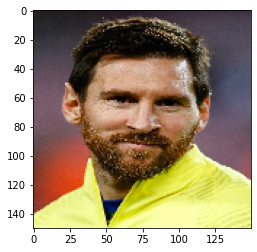

In [ ]:
#Testing
from keras.preprocessing.image import load_img,img_to_array
from keras_preprocessing import image
classes = ['messi','neymar','ronaldo']
test_image = image.load_img('/content/messi.jpg', target_size=(150, 150))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
result1 = np.argmax(result,axis = 1)
print(result1)
result1 = result[0]
for y in range(3):
    if result1[y] == 1.:
        break
prediction = classes[y]
print(prediction)


[2]
ronaldo


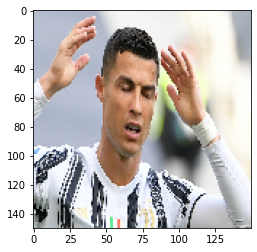

In [ ]:
test_image2 = image.load_img('/content/drive/MyDrive/data_face/test/ronaldo/mu-1_korp.jpg', target_size=(150, 150))
plt.imshow(test_image2)
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis=0)
result2 = model.predict(test_image2)
result3 = np.argmax(result2,axis = 1)
print(result3)
result3 = result2[0]
for y in range(3):
    if result3[y] == 1.:
        break
prediction2 = classes[y]
print(prediction2)